In [ ]:
#Import modules
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
#Image path
path = Path("/content/image_4382.jpg")
#Load the image
img = image.load_img(path, target_size=(224,224))
image_array = image.img_to_array(img)

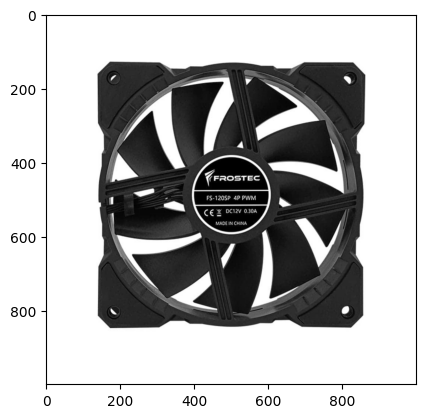

In [ ]:
x_train = np.expand_dims(image_array, axis=0)
#Normalize the data
x_train = vgg16.preprocess_input(x_train)
data = plt.imread(path)
plt.imshow(data)
plt.show()

In [ ]:
model = vgg16.VGG16(weights="imagenet")

In [ ]:
prediction = model.predict(x_train)
pred = vgg16.decode_predictions(prediction)
print(pred)


[[('n03271574', 'electric_fan', 0.70341295), ('n03803284', 'muzzle', 0.2855831), ('n04133789', 'sandal', 0.0019281309), ('n02769748', 'backpack', 0.0018934937), ('n02910353', 'buckle', 0.0013712205)]]


Creating image dataset

In [ ]:
import os
import csv

# Path to the directory where the images are stored
image_directory = '/content/drive/MyDrive/entity_images/voltage'

# Create a CSV file to store the image information
csv_file_path = 'image_dataset.csv'

# Open the CSV file for writing
with open(csv_file_path, 'w', newline='') as csv_file:
    # Define the column names for the CSV file
    fieldnames = ['image_id', 'file_path', 'label']  # You can add or remove columns based on your needs
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Loop through the images in the directory
    for index, image_file in enumerate(os.listdir(image_directory)):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):  # Check for image files
            file_path = os.path.join(image_directory, image_file)

            # Generate a sample label (optional) - you can modify this based on your actual labels
            label = 'label_' + str(index % 10)  # Just an example, assigning labels cyclically

            # Write the image information into the CSV
            writer.writerow({
                'image_id': index,
                'file_path': file_path,
                'label': label  # Or None if you don't have labels
            })

print(f"CSV file has been created: {csv_file_path}")

CSV file has been created: image_dataset.csv


Text extraction from images

In [ ]:
!pip install keras-ocr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [ ]:
df=pd.read_csv("/content/image_dataset.csv")

In [ ]:
df.head()

,image_id,file_path,label
0,0,/content/images_voltage/image_3931.jpg,label_0
1,1,/content/images_voltage/image_2033.jpg,label_1
2,2,/content/images_voltage/image_1955.jpg,label_2
3,3,/content/images_voltage/image_4500.jpg,label_3
4,4,/content/images_voltage/image_3948.jpg,label_4


In [ ]:
df.shape

(297, 3)

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 21.9 MB/s eta 0:00:00


In [ ]:
import easyocr

reader = easyocr.Reader(['en'], gpu = True)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
import keras_ocr
import tensorflow as tf

print(f"Keras OCR version: {keras_ocr.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras OCR version: 0.9.3
TensorFlow version: 2.17.0


In [ ]:
!pip uninstall keras-ocr tensorflow
!pip install keras-ocr tensorflow==2.8.0

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 89.8 MB/s eta 0:00:00
   ━

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


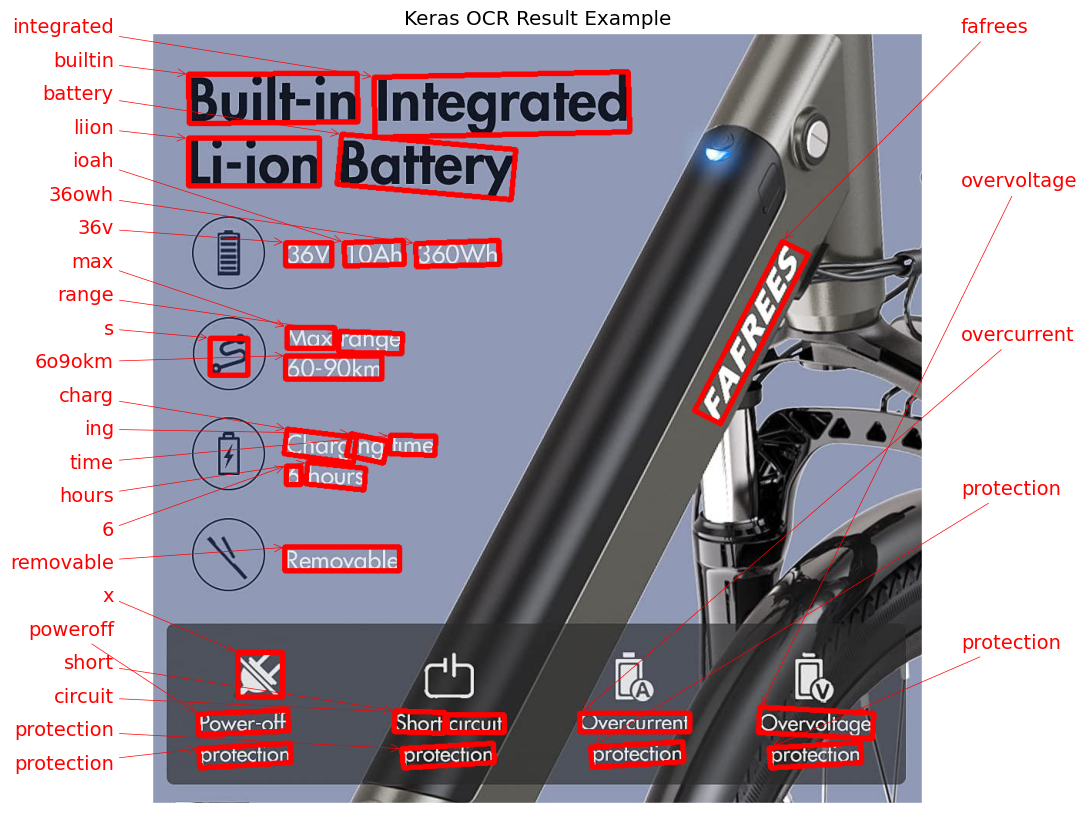

['integrated', 'builtin', 'liion', 'battery', 'ioah', '36owh', '36v', 'fafrees', 'max', 'range', 's', '6o9okm', 'charg', 'ing', 'time', 'hours', '6', 'removable', 'x', 'poweroff', 'short', 'overvoltage', 'overcurrent', 'circuit', 'protection', 'protection', 'protection', 'protection']


In [ ]:
yimport pandas as pd
import matplotlib.pyplot as plt
import keras_ocr

# Load your dataset (CSV containing image paths)
csv_file_path = '/content/image_dataset.csv'  # Path to your CSV file
df = pd.read_csv(csv_file_path)

# Extract image file paths from the CSV
img_fns = df['file_path'].tolist()  # Assuming 'file_path' is the column with image paths

extracted_texts = []

# Initialize the Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Load an image from your dataset for OCR
image = keras_ocr.tools.read(img_fns[34])  # Load the 12th image (index 11)

# Perform OCR on the image using Keras OCR
results = pipeline.recognize([image])

    # Extract the text from results
image_texts = [result[0] for result in results[0]]  # result[0] contains the recognized text
extracted_texts.append(image_texts)

# Flatten the list of lists if needed
flattened_texts = [text for sublist in extracted_texts for text in sublist]

# Visualize the OCR results
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image, results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()


print(flattened_texts)  # This will print the array of all extracted text

Extracting Voltage from the extrated text

['36v']


In [ ]:
extracted_texts = []
img_fns = df['file_path'].tolist()

# Perform OCR on all images and store extracted text

image = keras_ocr.tools.read(img_fns[11])
results = pipeline.recognize([image])

    # Extract the text from results
image_texts = [result[0] for result in results[0]]  # result[0] contains the recognized text
extracted_texts.append(image_texts)

# Flatten the list of lists if needed
flattened_texts = [text for sublist in extracted_texts for text in sublist]

print(flattened_texts)  # This will print the array of all extracted text

['3', '2', '2or', 'ood', '2815', '207']


In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load dataset
df = pd.read_csv('image_dataset.csv')
img_fns = df['file_path'].tolist()

# Initialize the Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Perform OCR on all images
all_results = []
for img_fn in img_fns:
    image = keras_ocr.tools.read(img_fn)
    results = pipeline.recognize([image])
    all_results.append((imagae, results))

# Randomly select 5 images to display
random_indices = random.sample(range(len(img_fns)), 5)

# Display OCR results for the randomly selected images
for i in random_indices:
    image, results = all_results[i]

    # Visualize the OCR results
    fig, ax = plt.subplots(figsize=(10, 10))
    keras_ocr.tools.drawAnnotations(image, results[0], ax=ax)
    ax.set_title(f'Keras OCR Result for Random Image {i+1}')
    plt.show()

    # Print the extracted text for each image
    print(f"Extracted text for Random Image {i+1}:")
    for result in results[0]:
        print(result[0])  # The recognized text
    print("\n" + "="*50 + "\n")

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras_ocr
import pandas as pd

# Load dataset
df = pd.read_csv('/content/image_dataset.csv')
df = df.head(2)
img_fns = df['file_path'].tolist()

# Initialize the Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Perform OCR on all images and store results
ocr_data = {'file_path': [], 'extracted_text': []}

for img_fn in img_fns:
    image = keras_ocr.tools.read(img_fn)
    results = pipeline.recognize([image])

    # Extract text from results
    extracted_text = [result[0] for result in results[0]]

    # Append to the dictionary
    ocr_data['file_path'].append(img_fn)
    ocr_data['extracted_text'].append(extracted_text)

# Convert the dictionary into a DataFrame
ocr_df = pd.DataFrame(ocr_data)

# Save the DataFrame to a CSV file if needed
ocr_df.to_csv('ocr_extracted_texts.csv', index=False)

# Print the resulting DataFrame
print(ocr_df)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
                                           file_path  \
0  /content/drive/MyDrive/entity_images/voltage/i...   
1  /content/drive/MyDrive/entity_images/voltage/i...   

                                      extracted_text  
0  [1cm1358w, 9, 368cml, 14481, 18ah, 48v, 4377, ...  
1  [281, q, st, freewheels, 80ow, 36v, 7, gabel, ...  


In [ ]:
ocr_df.columns

Index(['file_path', 'extracted_text'], dtype='object')

In [ ]:
import re

# Use regular expression to extract items that match the pattern (digits followed by 'v')
voltage_values = [text for text in extracted_text[0] if re.match(r'\d+v', text)]

# Print the extracted voltage values
print(voltage_values)  # Output: ['110v', '230v']

[]


In [ ]:
import pandas as pd
import re

# Load the CSV file into a DataFrame
file_path = '/content/ocr_extracted_texts.csv'
df = pd.read_csv(file_path)

# Define a function to extract voltage values from the extracted_text column
def extract_voltage(text_list):
    voltage_pattern = r'(\d+(?:\.\d+)?\s?(?:v|kV|mV))'  # Regex pattern to match voltage values
    voltages = []
    for text in text_list:
        matches = re.findall(voltage_pattern, text)
        voltages.extend(matches)
    return ', '.join(voltages) if voltages else 'No voltage found'

# Apply the function to the 'extracted_text' column
df['extracted_voltages'] = df['extracted_text'].apply(lambda x: extract_voltage(eval(x)))

# Display the DataFrame with the extracted voltages
print(df[['file_path', 'extracted_voltages']])


                                           file_path  extracted_voltages
0  /content/drive/MyDrive/entity_images/voltage/i...  48v, 48v, 48v, 48v
1  /content/drive/MyDrive/entity_images/voltage/i...                 36v


In [ ]:
df.extracted_voltages

,extracted_voltages
0,"48v, 48v, 48v, 48v"
1,36v



Processing image: https://m.media-amazon.com/images/I/91Ih7dEj22L.jpg
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


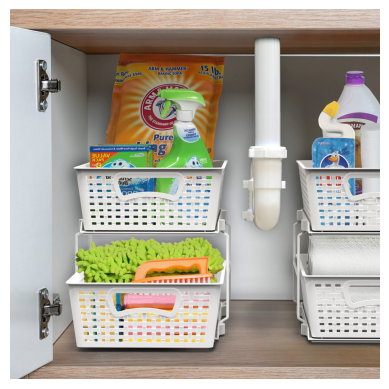

IndexError: string index out of range

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import re
import numpy as np
import urllib.request
import pandas as pd
import keras_ocr

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converts to grayscale
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Blurs the grayscale image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    # If you need to work with a color image afterward, convert it back to 3-channel
    thresh_3ch = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)  # Convert to 3-channel
    return thresh_3ch

# ----- Step 2: Load Image -----
def load_image(image_source):
    if image_source.startswith('http'):
        try:
            resp = urllib.request.urlopen(image_source)
            img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
            img = cv2.imdecode(img_array, -1)
        except Exception as e:
            print(f"Error loading image from URL: {e}")
            return None
    else:
        try:
            img = cv2.imread(image_source)
            if img is None:
                raise ValueError("Image not found or invalid file path")
        except Exception as e:
            print(f"Error loading image from file path: {e}")
            return None

    return img

# ----- Step 3: OCR for Text Detection using KerasOCR -----
def detect_text_from_image(image_source):
    img = load_image(image_source)
    if img is None:
        return None, []

    # Preprocess the image
    preprocessed_img = preprocess_image(img)

    # Use KerasOCR for text detection
    pipeline = keras_ocr.pipeline.Pipeline()
    prediction_groups = pipeline.recognize([preprocessed_img])

    detected_text = []
    for prediction in prediction_groups[0]:
        bbox, text = prediction
        detected_text.append((bbox, text))

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb, detected_text

# ----- Step 4: Standardize Units -----
unit_mapping = {
    'kgs': 'kilogram', 'KG': 'kilogram', 'KGS': 'kilogram', 'Kgs': 'kilogram',
    'kg': 'kilogram', 'Kilogram': 'kilogram', 'K':'kilogram',
    'lbs': 'pound', 'LBS': 'pound', 'Lbs': 'pound', 'lb': 'pound',
    'g': 'gram', 'Grams': 'gram', 'grams': 'gram', 'G': 'gram',
    'oz': 'ounce'
}

def standardize_unit(text):
    for unit, standard in unit_mapping.items():
        text = re.sub(r'\b' + re.escape(unit) + r'\b', standard, text, flags=re.IGNORECASE)
    return text

# ----- Step 5: Regex for Custom Weight and Capacity Extraction -----
def extract_weights_and_capacities(text_with_bbox):
    # Merge text from multiple lines
    full_text = merge_multi_line_text(text_with_bbox)

    # Standardize units first
    standardized_text = standardize_unit(full_text)

    # Regex to extract weights including ranges
    weight_pattern = re.compile(r'(\d+\.?\d*)\s?(?:-|to|–)\s?(\d+\.?\d*)?\s*(kilogram|gram|pound|oz)', re.IGNORECASE)
    weights = re.findall(weight_pattern, standardized_text)

    # Regex to extract capacities including ranges
    capacity_pattern = re.compile(r'(?:capacity|weight bearing|up to|max)\s?(\d+\.?\d*)?\s*(?:-|to|–)?\s*(\d+\.?\d*)?\s*(kilogram|gram|LBS|pound|liters?|l|oz)?', re.IGNORECASE)
    capacity_match = re.search(capacity_pattern, standardized_text)

    return weights, capacity_match

def merge_multi_line_text(text_with_bbox):
    # Sort by vertical position to handle multi-line text
    text_with_bbox.sort(key=lambda x: x[0][0][1])
    return ' '.join(text for _, text in text_with_bbox)

# ----- Step 6: Comparison with Entity Values -----
def compare_with_entity_value(extracted_value, entity_value):
    extracted_value = extracted_value.lower().replace(' ', '')
    entity_value = entity_value.lower().replace(' ', '')

    return extracted_value == entity_value

# ----- Step 7: Main Function -----
def main(image_source, entity_value):
    img_rgb, text_with_bbox = detect_text_from_image(image_source)

    if img_rgb is None:
        print("Failed to process the image.")
        return

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Extract the text
    full_text = merge_multi_line_text(text_with_bbox)

    # Extract weights and capacities using regex
    custom_weights, capacity_match = extract_weights_and_capacities(text_with_bbox)

    # Process and display ranges
    extracted_value = ""
    if capacity_match:
        extracted_value = f"{capacity_match.group(1)} {capacity_match.group(2)}"
        print(f"Detected Capacity: {extracted_value}")
    elif custom_weights:
        extracted_value = f"{custom_weights[0][0]} {custom_weights[0][1]}"
        print(f"Detected Weight: {extracted_value}")
    else:
        print("No weight or capacity detected.")

    # Compare with the entity value
    match = compare_with_entity_value(extracted_value, entity_value)
    if match:
        print("\nDetected value matches the entity value.")
    else:
        print("\nDetected value does not match the entity value.")

# ----- Step 8: Run with the Dataset -----
# Load the dataset (replace this path with your actual CSV file path)
df = pd.read_csv(r'train1.csv')

# Test the model with an image and compare OCR result with entity_value
for idx, row in df.iterrows():
    image_source = row['image_link']  # Use image link from the dataset
    entity_value = row['entity_value']  # Use entity value from the dataset
    print(f"\nProcessing image: {image_source}")
    main(image_source, entity_value)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5

Processing image: https://m.media-amazon.com/images/I/91Ih7dEj22L.jpg


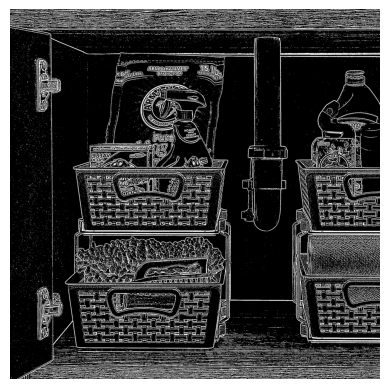

No weight or capacity detected.

Processing image: https://m.media-amazon.com/images/I/711kShV-XoL.jpg


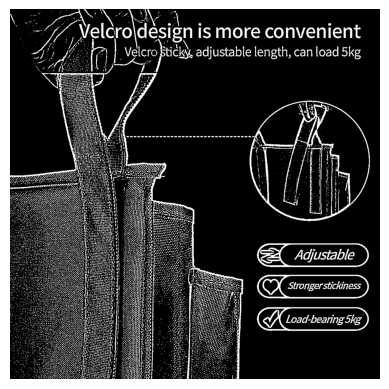

No weight or capacity detected.

Processing image: https://m.media-amazon.com/images/I/61NxwBiYV-L.jpg


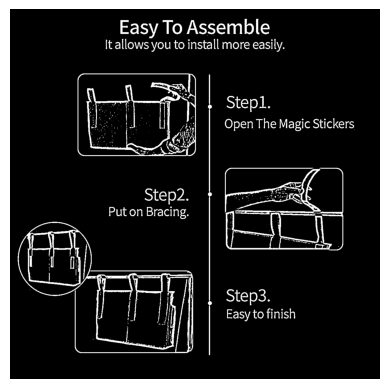

No weight or capacity detected.

Processing image: https://m.media-amazon.com/images/I/71odc3RzkjL.jpg


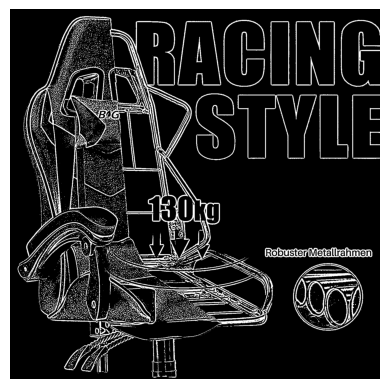

No weight or capacity detected.

Processing image: https://m.media-amazon.com/images/I/81dhyYo0KyL.jpg


KeyboardInterrupt: 

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import re
import numpy as np
import urllib.request
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import keras_ocr

# Initialize KerasOCR Pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# ----- Step 1: Preprocess Image for Better OCR Detection -----
def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# ----- Step 2: Load Image -----
def load_image(image_source):
    if image_source.startswith('http'):
        try:
            resp = urllib.request.urlopen(image_source)
            img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
            img = cv2.imdecode(img_array, -1)
        except Exception as e:
            print(f"Error loading image from URL: {e}")
            return None
    else:
        try:
            img = cv2.imread(image_source)
            if img is None:
                raise ValueError("Image not found or invalid file path")
        except Exception as e:
            print(f"Error loading image from file path: {e}")
            return None

    return img

# ----- Step 3: OCR for Text Detection with KerasOCR -----
def detect_text_from_image(image_source):
    img = load_image(image_source)
    if img is None:
        return None, []

    preprocessed_img = preprocess_image(img)

    # Convert preprocessed image to RGB format for KerasOCR
    img_rgb = cv2.cvtColor(preprocessed_img, cv2.COLOR_GRAY2RGB)

    # Use KerasOCR to detect text
    predictions = pipeline.recognize([img_rgb])[0]

    detected_text = []
    for prediction in predictions:
        bbox, text = prediction[1], prediction[0]  # KerasOCR provides bbox as first, text as second
        detected_text.append((bbox, text))

    return img_rgb, detected_text

# ----- Step 4: Standardize Units -----
unit_mapping = {
    'kgs': 'kilogram',
    'KG': 'kilogram',
    'KGS': 'kilogram',
    'Kgs': 'kilogram',
    'kg': 'kilogram',
    'Kilogram': 'kilogram',
    'K':'kilogram',
    'lbs': 'pound',
    'LBS': 'pound',
    'Lbs': 'pound',
    'lb': 'pound',
    'l':'pound',
    'g': 'gram',
    'Grams': 'gram',
    'grams': 'gram',
    'G': 'gram',
    'oz':'ounce'
}

def standardize_unit(text):
    for unit, standard in unit_mapping.items():
        text = re.sub(r'\b' + re.escape(unit) + r'\b', standard, text, flags=re.IGNORECASE)
    return text

# ----- Step 5: Regex for Custom Weight and Capacity Extraction -----
def extract_weights_and_capacities(text_with_bbox):
    full_text = merge_multi_line_text(text_with_bbox)
    standardized_text = standardize_unit(full_text)

    weight_pattern = re.compile(r'(\d+\.?\d*)\s?(kilogram|gram|pound|oz)', re.IGNORECASE)
    weights = re.findall(weight_pattern, standardized_text)

    capacity_pattern = re.compile(r'(?:capacity|weight bearing|up to|max|load)\s?(\d+\.?\d*)?\s*(kilogram|gram|LBS|pound|liters?|l|oz)', re.IGNORECASE)
    capacity_match = re.search(capacity_pattern, standardized_text)

    return weights, capacity_match

def merge_multi_line_text(text_with_bbox):
    text_with_bbox.sort(key=lambda x: x[0][0][1])
    return ' '.join(text for _, text in text_with_bbox)

# ----- Step 6: Compare with Entity Values -----
def compare_with_entity_value(extracted_value, entity_value):
    extracted_value = extracted_value.lower().replace(' ', '')
    entity_value = entity_value.lower().replace(' ', '')

    return extracted_value == entity_value

# ----- Step 7: Calculate F1 Score -----
def calculate_f1_score(log_data, df):
    y_true = []
    y_pred = []

    for entry in log_data:
        idx = entry['index']
        detected_value = entry['detected_value'].lower().replace(' ', '')
        entity_value = df.loc[idx, 'entity_value'].lower().replace(' ', '')

        y_true.append(entity_value)
        y_pred.append(detected_value)

    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    return precision, recall, f1

# ----- Step 8: Main Function -----
def main(image_source, entity_value, log_data, idx):
    img_rgb, text_with_bbox = detect_text_from_image(image_source)

    if img_rgb is None:
        print("Failed to process the image.")
        return

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    custom_weights, capacity_match = extract_weights_and_capacities(text_with_bbox)

    extracted_value = ""
    if capacity_match:
        extracted_value = f"{capacity_match.group(1)} {capacity_match.group(2)}"
        print(f"Detected Capacity: {extracted_value}")
    elif custom_weights:
        extracted_value = f"{custom_weights[0][0]} {custom_weights[0][1]}"
        print(f"Detected Weight: {extracted_value}")
    else:
        print("No weight or capacity detected.")

    log_data.append({'index': idx, 'detected_value': extracted_value})

# ----- Step 9: Run with the Dataset -----
# Load the dataset (replace this path with your actual CSV file path)
df = pd.read_csv(r'train1.csv')

log_data = []

# Process images and log the detected values
for idx, row in df.iterrows():
    image_source = row['image_link']
    entity_value = row['entity_value']
    print(f"\nProcessing image: {image_source}")
    main(image_source, entity_value, log_data, idx)

# Calculate F1 Score after processing all images
precision, recall, f1 = calculate_f1_score(log_data, df)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


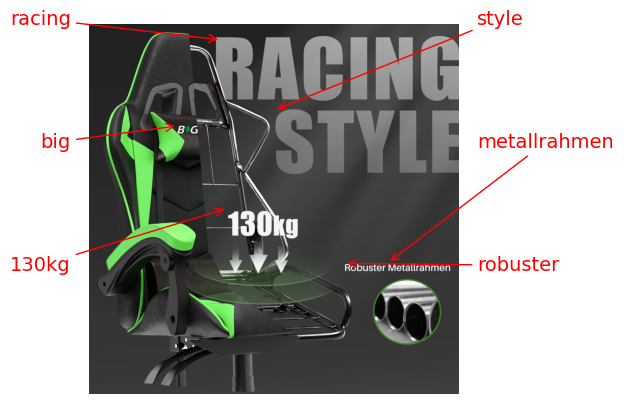


Predicted Texts from the Image:
['racing', 'style', 'big', '130kg', 'metallrahmen', 'robuster']


In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
import cv2
import urllib.request
import numpy as np

# Initialize the KerasOCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# ----- Step 1: Load Image from URL or Path -----
def load_image(image_source):
    if image_source.startswith('http'):
        try:
            # If image is from a URL
            resp = urllib.request.urlopen(image_source)
            img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
            img = cv2.imdecode(img_array, -1)
        except Exception as e:
            print(f"Error loading image from URL: {e}")
            return None
    else:
        try:
            # If image is from a local path
            img = cv2.imread(image_source)
            if img is None:
                raise ValueError("Image not found or invalid file path")
        except Exception as e:
            print(f"Error loading image from file path: {e}")
            return None

    return img

# ----- Step 2: Detect Text using KerasOCR and Store Results in a List -----
def detect_text_with_keras_ocr(image_source):
    img = load_image(image_source)

    if img is None:
        print("Failed to load the image.")
        return []

    # Convert the image to RGB (keras-ocr expects RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform text detection using KerasOCR
    predictions = pipeline.recognize([img_rgb])[0]  # Recognize text in the image

    detected_text_list = []

    # Collect detected text into a list
    for prediction in predictions:
        text = prediction[0]
        detected_text_list.append(text)

    # Plot the image with detected text and bounding boxes
    keras_ocr.tools.drawAnnotations(image=img_rgb, predictions=predictions)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Return the list of detected texts
    return detected_text_list

# ----- Step 3: Test the Detection and Collect Results -----
image_url = 'game.jpg'  # Replace with your image URL or file path
predicted_texts = detect_text_with_keras_ocr(image_url)

# Print the list of predicted texts
print("\nPredicted Texts from the Image:")
print(predicted_texts)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5

Processing image: https://m.media-amazon.com/images/I/91Ih7dEj22L.jpg


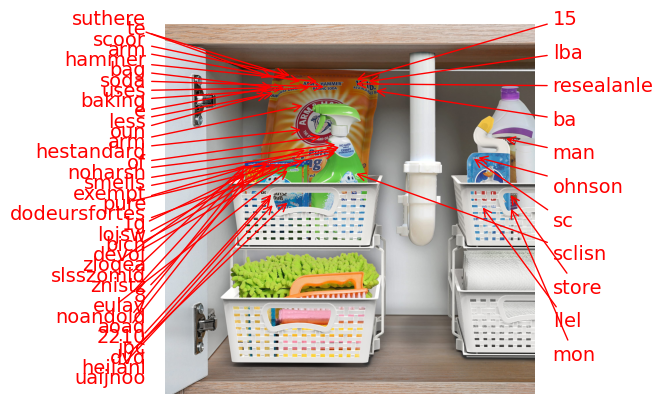


Detected Weights/Capacities:

No ranges detected.

Processing image: https://m.media-amazon.com/images/I/711kShV-XoL.jpg


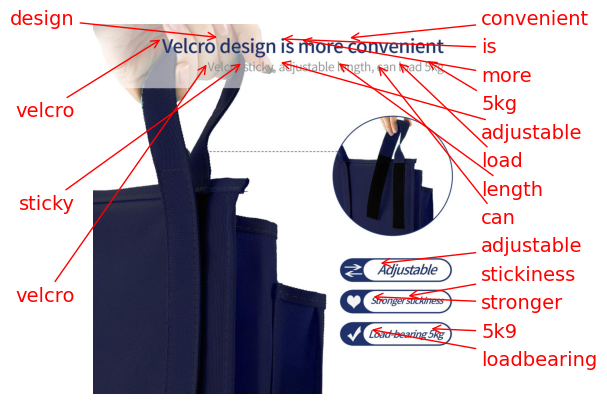


Detected Weights/Capacities:

No ranges detected.

Processing image: https://m.media-amazon.com/images/I/61NxwBiYV-L.jpg


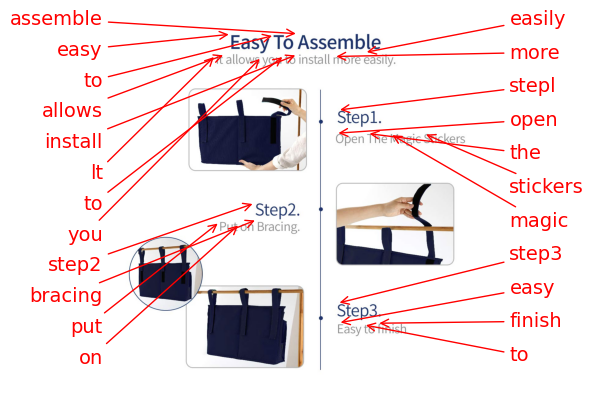


Detected Weights/Capacities:

No ranges detected.

Processing image: https://m.media-amazon.com/images/I/71odc3RzkjL.jpg


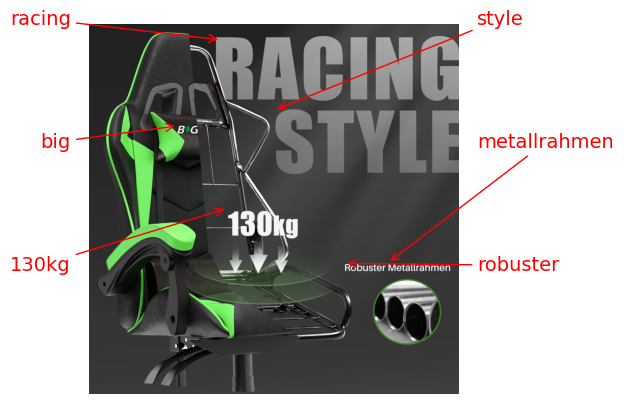


Detected Weights/Capacities:

No ranges detected.

Processing image: https://m.media-amazon.com/images/I/81dhyYo0KyL.jpg


In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
import cv2
import urllib.request
import numpy as np
import re
import pandas as pd

# Initialize the KerasOCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# ----- Step 1: Load Image from URL or Path -----
def load_image(image_source):
    if image_source.startswith('http'):
        try:
            # If image is from a URL
            resp = urllib.request.urlopen(image_source)
            img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
            img = cv2.imdecode(img_array, -1)
        except Exception as e:
            print(f"Error loading image from URL: {e}")
            return None
    else:
        try:
            # If image is from a local path
            img = cv2.imread(image_source)
            if img is None:
                raise ValueError("Image not found or invalid file path")
        except Exception as e:
            print(f"Error loading image from file path: {e}")
            return None

    return img

# ----- Step 2: Detect Text using KerasOCR and Store Results in a List -----
def detect_text_with_keras_ocr(image_source):
    img = load_image(image_source)

    if img is None:
        print("Failed to load the image.")
        return []

    # Convert the image to RGB (keras-ocr expects RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform text detection using KerasOCR
    predictions = pipeline.recognize([img_rgb])[0]  # Recognize text in the image

    detected_text_list = []

    # Collect detected text into a list
    for prediction in predictions:
        text = prediction[0]
        detected_text_list.append(text)

    # Plot the image with detected text and bounding boxes
    keras_ocr.tools.drawAnnotations(image=img_rgb, predictions=predictions)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Return the list of detected texts
    return detected_text_list

# ----- Step 3: Standardize Units using Regex -----
unit_mapping = {
    'kgs': 'kilogram',
    'KG': 'kilogram',
    'KGS': 'kilogram',
    'Kgs': 'kilogram',
    'kg': 'kilogram',
    'Kilogram': 'kilogram',
    'lbs': 'pound',
    'LBS': 'pound',
    'Lbs': 'pound',
    'lb': 'pound',
    'g': 'gram',
    'G': 'gram',
    'oz': 'ounce'
}

def standardize_units(text):
    for unit, standard in unit_mapping.items():
        text = re.sub(r'\b' + re.escape(unit) + r'\b', standard, text, flags=re.IGNORECASE)
    return text

# ----- Step 4: Extract Weights, Capacities, and Ranges -----
def extract_weights_capacities(text_list):
    full_text = ' '.join(text_list)

    # Standardize units first
    standardized_text = standardize_units(full_text)

    # Regex to extract weights, capacities, and ranges like "0kg-25kg"
    weight_capacity_pattern = re.compile(r'(\d+\.?\d*)\s?(kilogram|gram|pound|ounce)')
    range_pattern = re.compile(r'(\d+\.?\d*)\s?(kilogram|gram|pound|ounce)\s?-\s?(\d+\.?\d*)\s?(kilogram|gram|pound|ounce)')

    weights = re.findall(weight_capacity_pattern, standardized_text)
    ranges = re.findall(range_pattern, standardized_text)

    return weights, ranges

# ----- Step 5: Main Function -----
def main(image_source):
    # Step 1: Detect text from the image using KerasOCR
    detected_text_list = detect_text_with_keras_ocr(image_source)

    # Step 2: Extract weights, capacities, and ranges using regex
    weights, ranges = extract_weights_capacities(detected_text_list)

    # Display the detected weights, capacities, and ranges
    print("\nDetected Weights/Capacities:")
    for weight in weights:
        print(f"Detected Weight/Capacity: {weight[0]} {weight[1]}")

    if ranges:
        print("\nDetected Ranges:")
        for r in ranges:
            print(f"Detected Range: {r[0]} {r[1]} to {r[2]} {r[3]}")
    else:
        print("\nNo ranges detected.")

    return weights, ranges

# ----- Step 6: Process Images from CSV and Save Results -----
def process_images_from_csv(csv_file_path, output_csv_path):
    # Read the CSV file (expecting a column named 'image_link')
    df = pd.read_csv(csv_file_path)

    results = []

    for idx, row in df.iterrows():
        image_source = row['image_link']
        print(f"\nProcessing image: {image_source}")

        # Process each image
        weights, ranges = main(image_source)

        # Append results (image link, weights, and ranges)
        results.append({
            'image_link': image_source,
            'weights': weights,
            'ranges': ranges
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Save the results to a new CSV file
    results_df.to_csv(output_csv_path, index=False)
    print(f"\nResults saved to {output_csv_path}")

# ----- Step 7: Run the Program -----
# Define input and output file paths
input_csv = '/content/train1.csv'  # Replace with your input CSV file
output_csv = 'output_results.csv'  # Output file for results

process_images_from_csv(input_csv, output_csv)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5

Processing image: https://m.media-amazon.com/images/I/91Ih7dEj22L.jpg

Processing image: https://m.media-amazon.com/images/I/711kShV-XoL.jpg

Processing image: https://m.media-amazon.com/images/I/61NxwBiYV-L.jpg

Processing image: https://m.media-amazon.com/images/I/71odc3RzkjL.jpg


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import keras_ocr

# Initialize the Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    return Image.open(BytesIO(response.content))

def extract_text_from_image(image):
    # Convert PIL image to array for Keras OCR
    image_array = keras_ocr.tools.pil_to_array(image)
    # Perform text detection and recognition
    prediction_groups = pipeline.recognize([image_array])
    # Extract text from predictions
    extracted_texts = [text for text, box in prediction_groups[0]]
    return extracted_texts

def process_images_from_csv(csv_path):
    # Read the CSV file
    df = pd.read_csv(csv_path)
    # Assuming the CSV has columns named 'image_id' and 'image_url'
    image_ids = df['image_id'].tolist()
    image_urls = df['image_url'].tolist()

    all_extracted_texts = []

    for image_id, url in zip(image_ids, image_urls):
        print(f"Processing image from URL: {url}")
        try:
            image = download_image(url)
            texts = extract_text_from_image(image)
            all_extracted_texts.append({'image_id': image_id, 'extracted_texts': texts})
        except Exception as e:
            print(f"Failed to process image from URL {url}: {e}")

    return all_extracted_texts

def save_results_to_csv(results, output_csv_path):
    # Convert the results to a DataFrame
    df = pd.DataFrame(results)
    # Convert lists of texts to a single string per row
    df['extracted_texts'] = df['extracted_texts'].apply(lambda texts: ' | '.join(texts))
    # Save to CSV
    df.to_csv(output_csv_path, index=False)

# Path to your CSV file and output file
input_csv_path = 'train1links.csv'  # Update with your input CSV file path
output_csv_path = 'extracted.csv'  # Update with desired output CSV file path

# Process images and save results
results = process_images_from_csv(input_csv_path)
save_results_to_csv(results, output_csv_path)

print(f"Results saved to {output_csv_path}")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
Unexpected error occurred for image URL https://m.media-amazon.com/images/I/71d+dz7ogkL.jpg: local variable 'image' referenced before assignment
Unexpected error occurred for image URL https://m.media-amazon.com/images/I/71k0T1lkazL.jpg: local variable 'image' referenced before assignment
Unexpected error occurred for image URL https://m.media-amazon.com/images/I/81OX3LrynvL.jpg: local variable 'image' referenced before assignment
Unexpected error occurred for image URL https://m.media-amazon.com/images/I/71kKyflqh-L.jpg: local variable 'image' referenced before assignment
Unexpected error occurred for image URL https://m.media-amazon.com/images/I/71Yl8r0WgHL.jpg: local variable 'image' referenced before assignment
Unexpected error occurred for image URL https://m.media-amazon.com/images/I/81xqMNmhEpL.jpg: local variable 'image' referenced before assignment
Unexpected error occurred for image URL